In [1]:
import numpy as np
import pickle
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [2]:
mnist = fetch_openml('mnist_784')

C:\Users\Siva Kumar\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
X = np.array(mnist.data)
y = np.array(mnist.target)

print('\nPreparing Classifier Training and Validation Data...')
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.1)


Preparing Classifier Training and Validation Data...


In [4]:
print('\nRandom Forest Classifier with n_estimators = 100, n_jobs = 10')
print('\nTraining the Classifier...')
clf = RandomForestClassifier(n_estimators=100, n_jobs=10)
clf.fit(X_train, y_train)


Random Forest Classifier with n_estimators = 100, n_jobs = 10

Training the Classifier...


RandomForestClassifier(n_jobs=10)

In [5]:
print('\nCalculating Accuracy of trained Classifier...')
confidence = clf.score(X_test, y_test)

print('\nMaking Predictions on Validation Data...')
y_pred = clf.predict(X_test)

print('\nCalculating Accuracy of Predictions...')
accuracy = accuracy_score(y_test, y_pred)

print('\nCreating Confusion Matrix...')
conf_mat = confusion_matrix(y_test, y_pred)

print('\nRFC Trained Classifier Confidence:', confidence)
print('\nAccuracy of Classifier on Validation Image Data:', accuracy)
print('\nConfusion Matrix:\n', conf_mat)


Calculating Accuracy of trained Classifier...

Making Predictions on Validation Data...

Calculating Accuracy of Predictions...

Creating Confusion Matrix...

RFC Trained Classifier Confidence: 0.9741428571428571

Accuracy of Classifier on Validation Image Data: 0.9741428571428571

Confusion Matrix:
 [[650   0   0   0   0   1   4   0   2   0]
 [  0 768   3   1   0   0   1   2   1   0]
 [  0   0 658   4   1   0   2   4   3   0]
 [  1   1   6 681   0   8   3   3   2   3]
 [  1   2   2   0 673   0   2   0   1  15]
 [  1   1   0   5   2 615   5   0   1   3]
 [  0   1   0   0   0   1 692   0   2   0]
 [  0   2  11   0   3   0   0 717   0   9]
 [  1   3   2   5   2   4   2   2 678  10]
 [  1   1   0   6   6   1   0   4   5 687]]


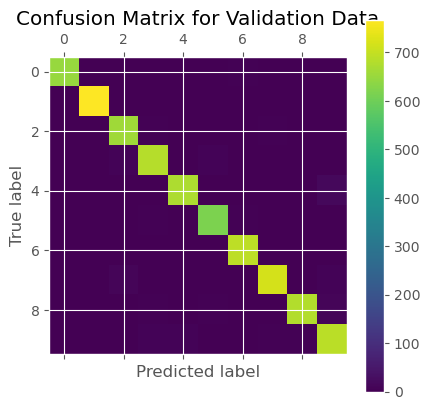

In [6]:
# Plot Confusion Matrix Data as a Matrix
plt.matshow(conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [7]:
print('\nMaking Predictions on Test Input Images...')
test_labels_pred = clf.predict(X_test)

print('\nCalculating Accuracy of Trained Classifier on Test Data...')
acc = accuracy_score(y_test, test_labels_pred)

print('\nCreating Confusion Matrix for Test Data...')
conf_mat_test = confusion_matrix(y_test, test_labels_pred)

print('\nAccuracy of Classifier on Test Images:', acc)
print('\nConfusion Matrix for Test Data:\n', conf_mat_test)


Making Predictions on Test Input Images...

Calculating Accuracy of Trained Classifier on Test Data...

Creating Confusion Matrix for Test Data...

Accuracy of Classifier on Test Images: 0.9741428571428571

Confusion Matrix for Test Data:
 [[650   0   0   0   0   1   4   0   2   0]
 [  0 768   3   1   0   0   1   2   1   0]
 [  0   0 658   4   1   0   2   4   3   0]
 [  1   1   6 681   0   8   3   3   2   3]
 [  1   2   2   0 673   0   2   0   1  15]
 [  1   1   0   5   2 615   5   0   1   3]
 [  0   1   0   0   0   1 692   0   2   0]
 [  0   2  11   0   3   0   0 717   0   9]
 [  1   3   2   5   2   4   2   2 678  10]
 [  1   1   0   6   6   1   0   4   5 687]]


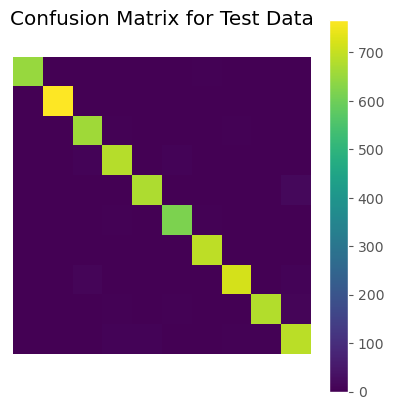

In [8]:
# Plot Confusion Matrix for Test Data
plt.matshow(conf_mat_test)
plt.title('Confusion Matrix for Test Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.axis('off')
plt.show()

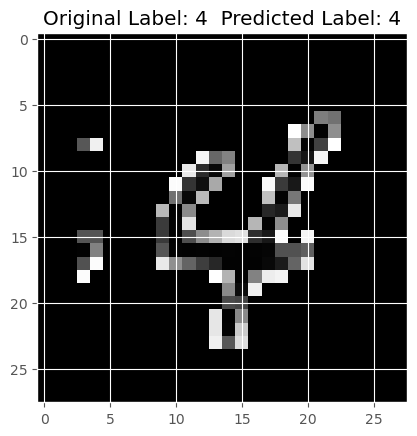

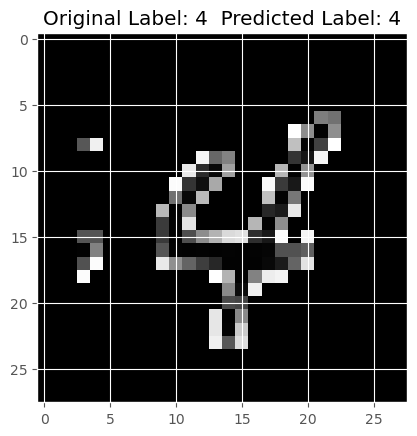

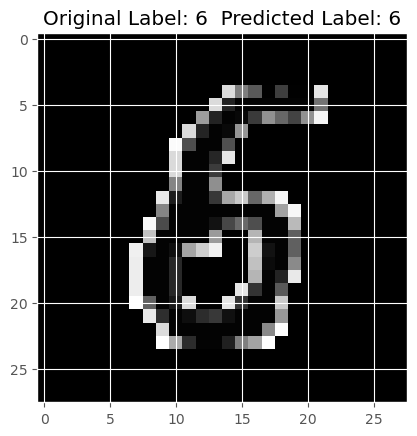

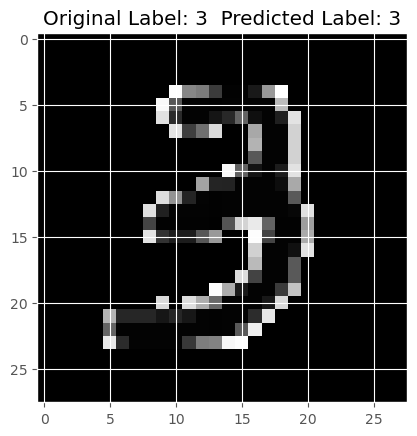

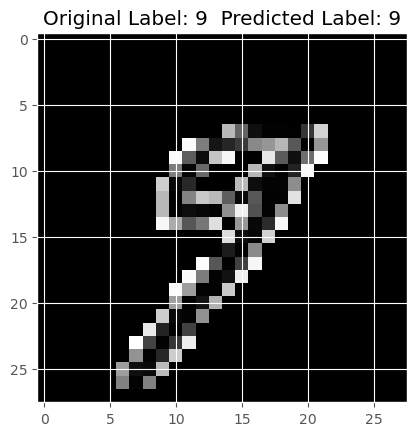

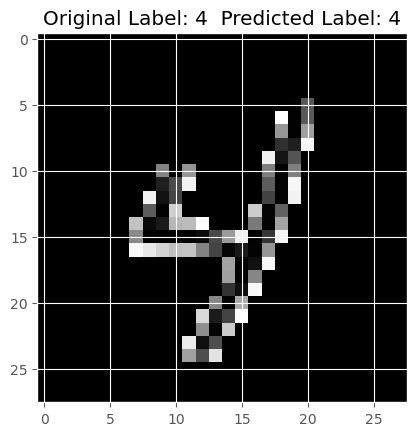

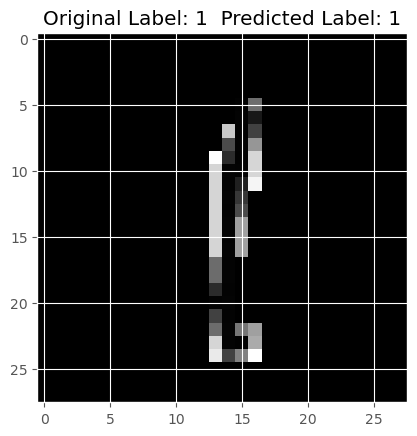

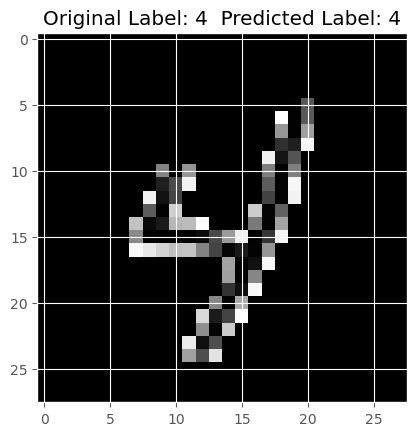

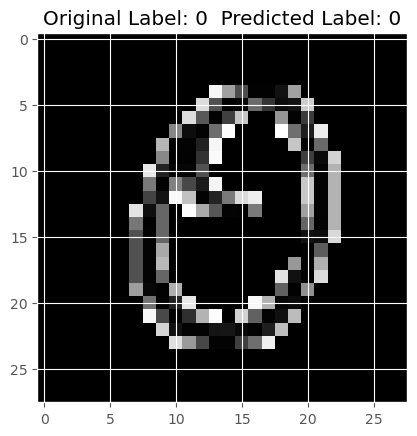

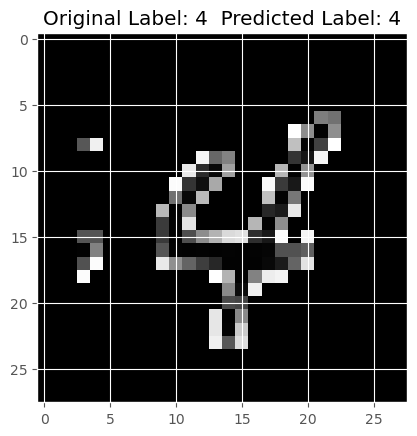

In [9]:
# Show the Test Images with Original and Predicted Labels
a = np.random.randint(1, 30, 10)
for i in a:
    two_d = (np.reshape(X_test[i], (28, 28)) * 255).astype(np.uint8)
    plt.title('Original Label: {0}  Predicted Label: {1}'.format(y_test[i], test_labels_pred[i]))
    plt.imshow(two_d, interpolation='nearest', cmap='gray')
    plt.show()